In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Carga el conjunto de datos de cáncer de mama.
df = pd.read_csv('./data/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.shape

(569, 6)

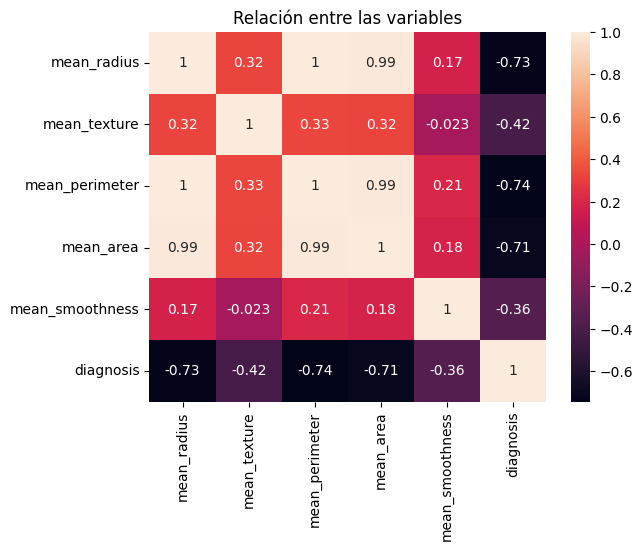

In [4]:
# Calcula la matriz de correlación entre todas las variables del DataFrame.
# Esto mide la relación lineal entre cada par de variables.
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Relación entre las variables')
plt.show()

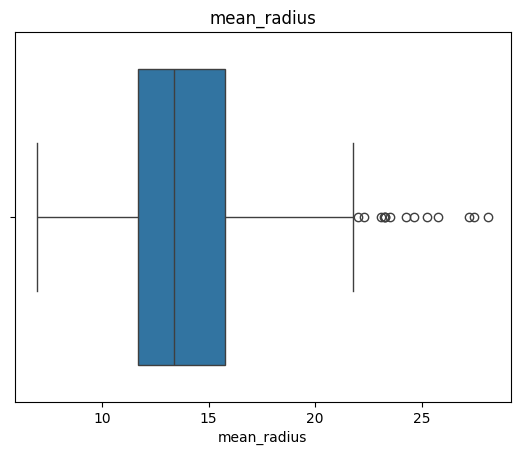

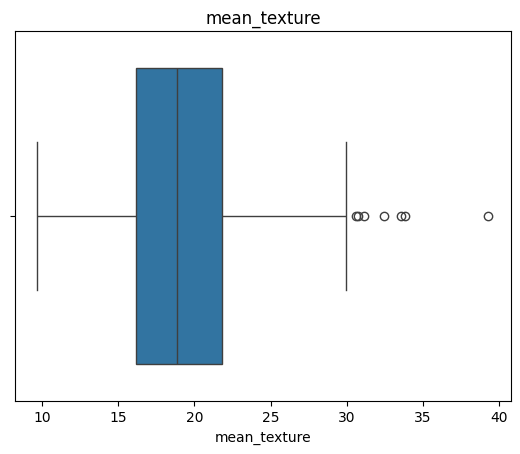

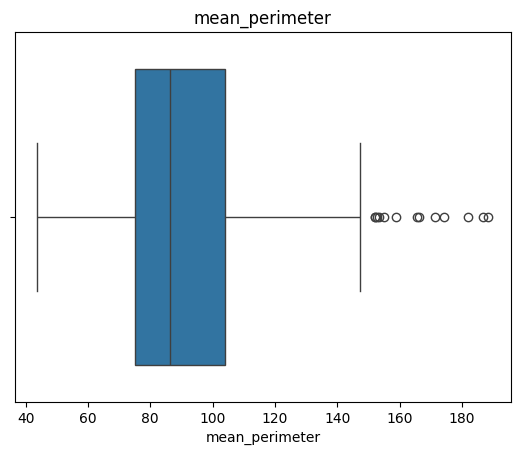

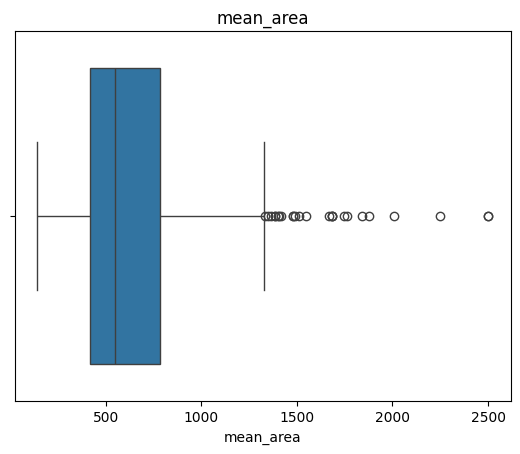

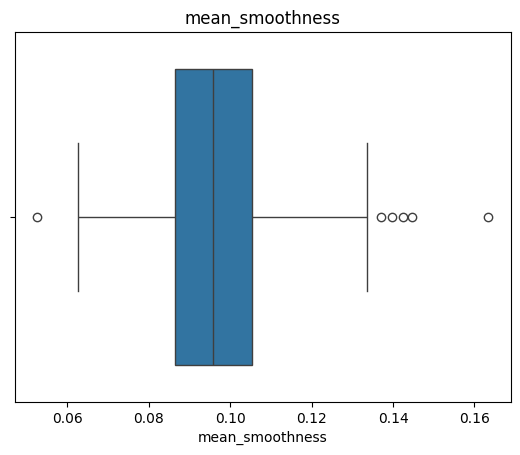

In [5]:
# Itera sobre cada columna del DataFrame.
for col in df.columns:
    if col == 'diagnosis':
        continue
    # Crea un boxplot para visualizar la distribución de los datos y detectar valores atípicos.
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [6]:
class LogisticRegression:
    """
    Clase para implementar un modelo de Regresión Logística desde cero.
    """
    def __init__(self, lr, epochs):
        """
        Inicializa los hiperparámetros del modelo.

        Args:
            lr (float): Tasa de aprendizaje para la optimización.
            epochs (int): Número de iteraciones para el entrenamiento.
        """
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_history = []
    ...
    def _sigmoid(self, z):
        """
        Calcula la función sigmoide, que mapea cualquier valor real a un rango entre 0 y 1.

        Args:
            z (np.array): Valores de entrada.

        Returns:
            np.array: Valores transformados por la función sigmoide.
        """
        return 1 / (1 + np.exp(-z))

    def _loss_function(self, y, y_hat):
        """
        Calcula la función de pérdida (entropía cruzada binaria).

        Args:
            y (np.array): Etiquetas verdaderas.
            y_hat (np.array): Predicciones del modelo.

        Returns:
            float: Valor de la pérdida.
        """
        epsilon = 1e-15
        return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

    def _calculate_model(self, X):
        """
        Calcula el modelo lineal y aplica la función sigmoide.

        Args:
            X (np.array): Datos de entrada.

        Returns:
            np.array: Predicciones del modelo.
        """
        # Multiplicación de la matriz de entrada por los pesos y se añade el sesgo
        linear_model = np.dot(X, self.weights) + self.bias
        # Aplica la función sigmoide para obtener las probabilidades
        y_hat = self._sigmoid(linear_model)
        return y_hat
    ...
    def fit(self, X_train, y_train):
        """
        Entrena el modelo usando el descenso de gradiente.

        Args:
            X_train (np.array): Datos de entrenamiento.
            y_train (np.array): Etiquetas de entrenamiento.

        Returns:
            tuple: Los pesos y el sesgo finales del modelo.
        """
        # Inicializa los pesos y el sesgo con valores aleatorios.
        self.weights = np.random.randn(X_train.shape[1], 1)
        self.bias = np.random.randn()

        for _ in range(self.epochs):
            # Calcula las predicciones del modelo.
            y_hat = self._calculate_model(X_train)
            
            # Calcula y almacena el costo para monitorear el entrenamiento.
            cost = self._loss_function(y_train, y_hat)
            self.cost_history.append(cost)

            # Calcula los gradientes de los pesos (dw) y el sesgo (db).
            dw = (1 / X_train.shape[0]) * np.dot(X_train.T, (y_hat - y_train))
            db = (1 / X_train.shape[0]) * np.sum(y_hat - y_train)

            # Actualiza los pesos y el sesgo.
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self.weights, self.bias

    def predict(self, X_test):
        """
        Realiza predicciones de clase (0 o 1) para nuevos datos.

        Args:
            X_test (np.array): Datos de prueba.

        Returns:
            np.array: Predicciones binarias (0 o 1).
        """
        # Calcula las probabilidades
        y_hat = self._calculate_model(X_test)
        # Convierte las probabilidades a 0 o 1 usando un umbral de 0.5.
        return np.astype((y_hat >= 0.5), int)

    def plot_cost_history(self):
        """
        Grafica la historia del costo a lo largo de las épocas.
        """
        plt.plot(range(self.epochs), self.cost_history)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Cost History")
        plt.show()

    def evaluate(self, y_test, y_pred):
        """
        Calcula y muestra métricas de rendimiento del modelo.

        Args:
            y_test (np.array): Etiquetas de prueba verdaderas.
            y_pred (np.array): Predicciones del modelo.
        """
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        print(f"Accuracy: {accuracy*100:.2f}%")
        print(f"Precision: {precision*100:.2f}%")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Confusion matrix:\n", confusion)

In [7]:
### Definición de variables y parámetros ###

# Asigna las columnas de características a la variable X. 
# Estas serán las variables de entrada para el modelo.
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']].values

# Asigna la columna 'diagnosis' a la variable y. 
# Esta es la variable objetivo (lo que queremos predecir).
y = df['diagnosis'].values

# Define la tasa de aprendizaje (learning rate). 
# Es un hiperparámetro que controla qué tanto se ajustan los pesos del modelo en cada iteración.
lr = 0.02

# Define el número de épocas. 
# Es la cantidad de veces que el algoritmo de entrenamiento verá todo el conjunto de datos.
epochs = 10000

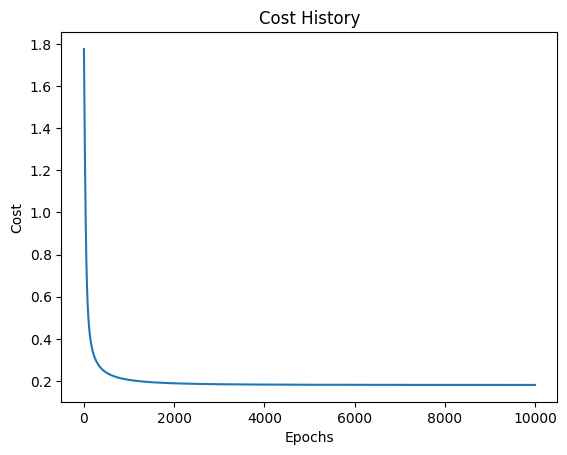

In [8]:
### División de los datos, escalado y entrenamiento del modelo ###

# Divide los datos en conjuntos de entrenamiento y prueba.
# `test_size=0.30` asigna el 30% de los datos para la prueba.
# `random_state=42` garantiza que la división sea reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Redimensiona las etiquetas para que tengan la forma (n_muestras, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Inicializa el escalador para estandarizar las características.
# Esto es importante para el descenso de gradiente, ya que variables con
# escalas muy diferentes pueden afectar el rendimiento del modelo.
scaler = StandardScaler()

# Ajusta el scaler SOLO en los datos de entrenamiento para evitar el "data leakage".
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba usando los parámetros del scaler ajustado
# con los datos de entrenamiento.
X_test_scaled = scaler.transform(X_test)

# Ahora se usa los datos escalados para entrenar y predecir
# Se instancia el modelo de regresión logística con los hiperparámetros definidos.
model = LogisticRegression(lr=lr, epochs=epochs)

# Entrena el modelo con los datos escalados de entrenamiento.
model.fit(X_train=X_train_scaled, y_train=y_train)

# Este método grafica el valor de la función de pérdida (costo) en cada época
# de entrenamiento.
model.plot_cost_history()

In [9]:
# Realizar predicciones en el conjunto de prueba escalado.
y_pred = model.predict(X_test_scaled)

# Evalúa el rendimiento del modelo comparando las etiquetas verdaderas (`y_test`)
# con las predicciones del modelo (`y_pred`).
model.evaluate(y_test, y_pred)

Accuracy: 95.32%
Precision: 97.17%
Recall: 0.95
F1 Score: 0.96
Confusion matrix:
 [[ 60   3]
 [  5 103]]
